Возможно простейшая из всех функций это $y=f(x)$. Далее мы создадим простейший график для такой функции, но сначала надо импортировать необходимые модули:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

Для всех графиков Matplotlib мы будем начинать с создания полотна (figure) и осей. В своей простейшей форми они могут быть созданы таким образом:

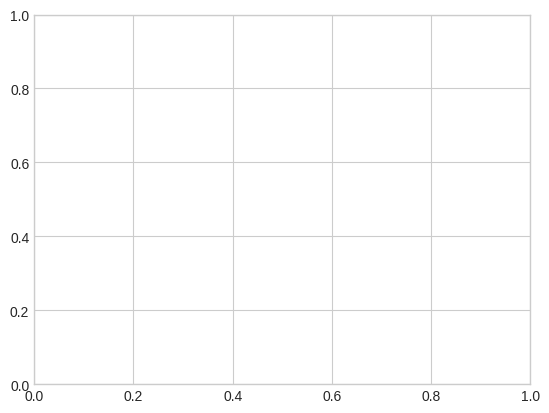

In [2]:
fig = plt.figure()
ax = plt.axes()

В Matplotlib, изображение _figure_ (объект класса `plt.Figure`) является единственный контейнером, который содержит все объекты представляющие оси, графики, текст и подписи. Оси _axes_ (объект класса `plt.Axes`) то, что мы видим выше: полотно с границами (bounding box) с засечками и метками, которые составляют элементы для визуализации. На протяжении всей книги мы будем использовать переменную `fig` для объекта изображения и `ax` для осей или группы осей.

После того как мы создали оси, мы можем использовать функцию `ax.plot` для отрисовки некоторых данных. Давайте начнём с простейшего синусоида:

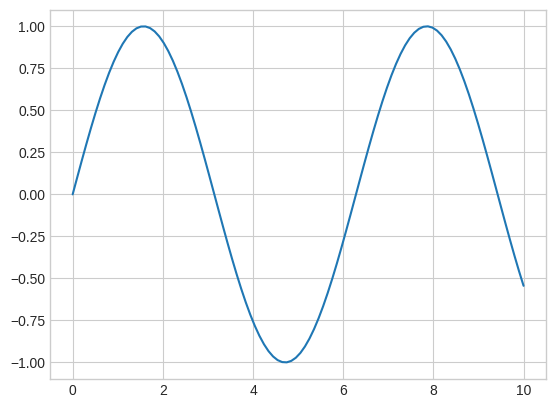

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))

Если нам необходимо создать изображение с несколькими линиями, мы просто можем вызвать функцию `plot` несколько раз:

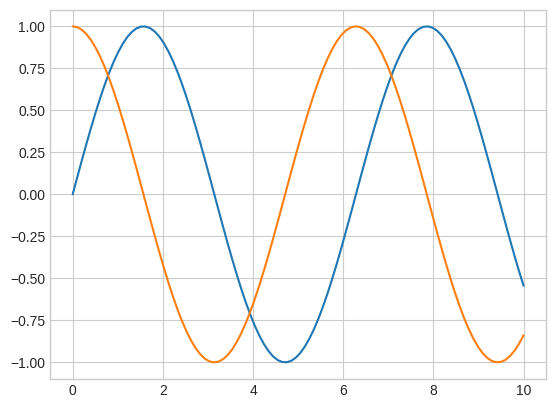

In [4]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

## Настройка изображения: цвет линий и стили

Функция `plt.plot()` принимает дополнительный аргумент `color=`, который принимает текстовое или цифровое описание цвета:

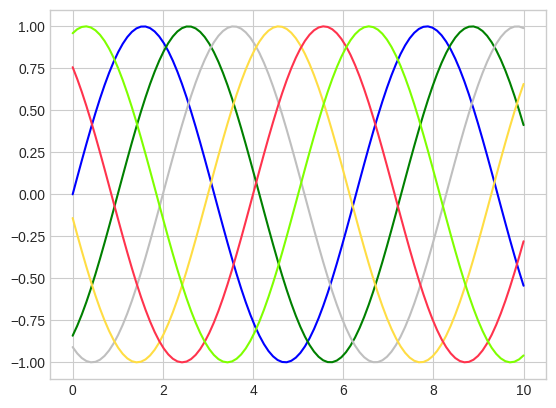

In [5]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Стиль может быть задан с помощью ключевого слова`linestyle`:

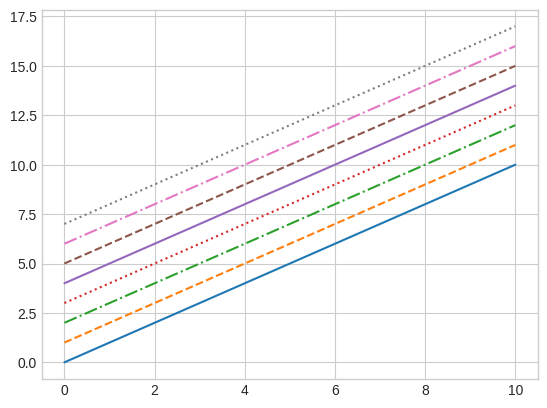

In [6]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Цвет и стиль могут быть скомбинированы в один аргумент без ключевого слова:

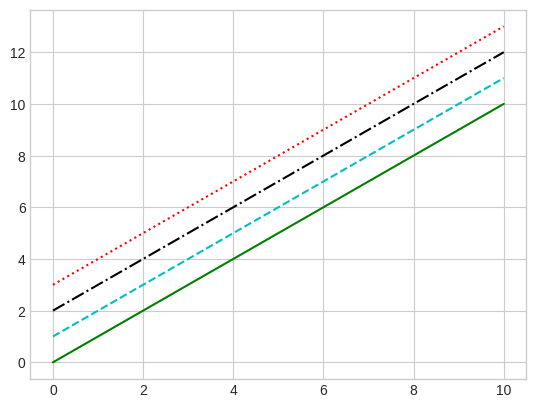

In [7]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Однобуквенный код цвета отражает основные цвета RGB и CMYK.

## Настройка изображения: пределы осей

Для изменения пределов отображения для осей, существуют два основных метода: `plt.xlim()` и `plt.ylim()`:

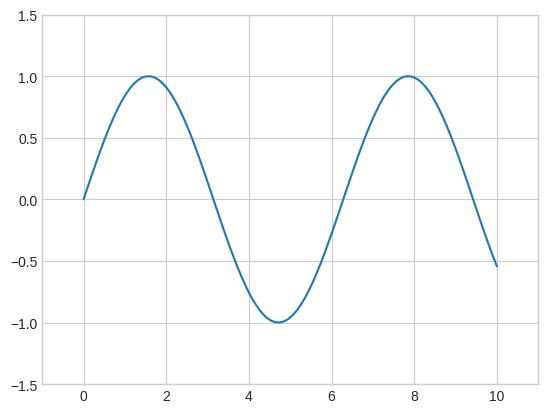

In [8]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Оси могут быть отображены в обратном порядке:

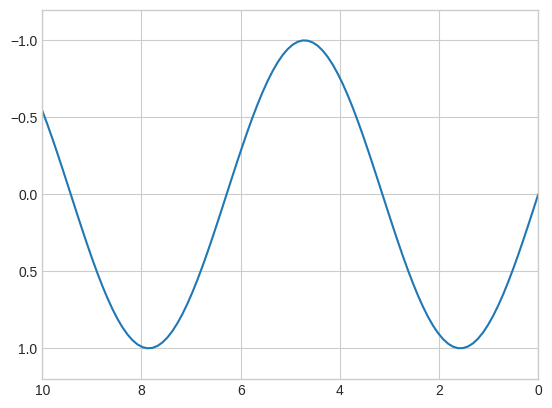

In [9]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

Другой полезный метод `plt.axis()` (обратите внимание на потенциальную путаницу между _axEs_ с _e_, и `axis` c _i_). Метод `plt.axis()` позволяет вам установить пределы по осям `x` и `y` с помощью единственного вызова, путем передачи списка значений: `[xmin, xmax, ymin, ymax]`:

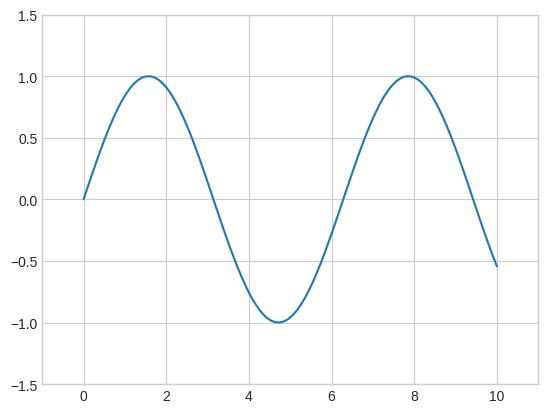

In [10]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Метод `plt.axis()` идёт дальше этого, позволяя вам делать вещи типа автоматического создания границ:

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

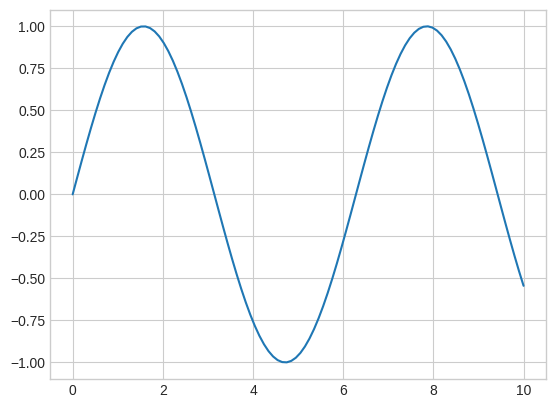

In [11]:
plt.plot(x, np.sin(x))
plt.axis('tight')

Он допускает даже более высокоуровневые описания, такие как сохранение пропорций между осями, таким образом одна единица по оси `x` будет равна единице по оси `y`:

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

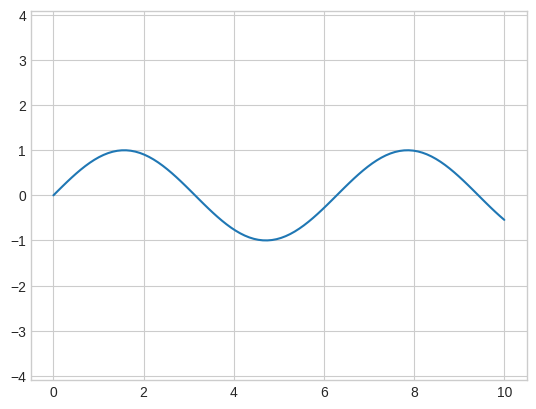

In [12]:
plt.plot(x, np.sin(x))
plt.axis("equal")

## Маркировка (labeling) графиков

Названия и метки осей являются простейшими из меток:

Text(0, 0.5, 'sin(x)')

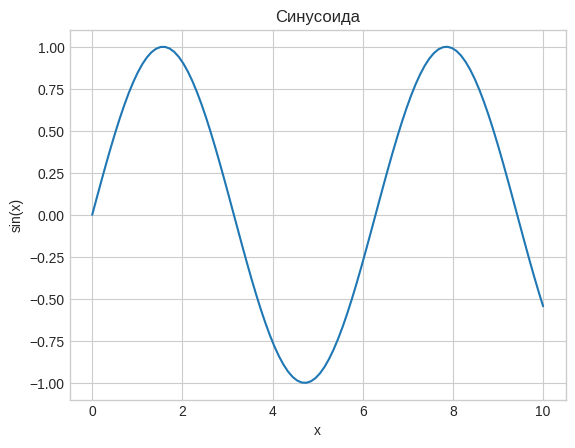

In [14]:
plt.plot(x, np.sin(x))
plt.title("Синусоида")
plt.xlabel("x")
plt.ylabel("sin(x)")

Можно также создать легенду:

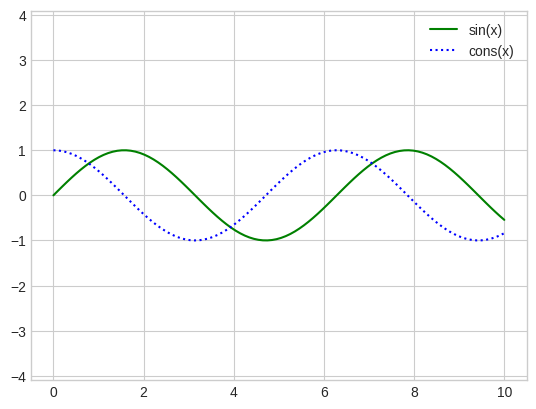

In [18]:
plt.plot(x, np.sin(x), "-g", label="sin(x)")
plt.plot(x, np.cos(x), ":b", label="cons(x)")
plt.axis("equal")
plt.legend()

## Matplotlib: подводные камни

В то время как большинство функций в `plt` транслируются напрямую в методы `ax` (например, `plt.plot()` -> `ax.plot()`, `plt.legend()`->`ax.legend()`, и т.д.), это не является правдой для всех команд. В частности, функции для установки пределов, меток и названий, немного модифицированы. Для перехода между функциями MATLAB-стиля и объектно-ориентированными фукнциями, необходимо учитывать следующие изменения:

* `plt.xlabel()` → `ax.set_xlabel()`
* `plt.ylabel()` → `ax.set_ylabel()`
* `plt.xlim()` → `ax.set_xlim()`
* `plt.ylim()` → `ax.set_ylim()`
* `plt.title()` → `ax.set_title()`

В объектно-ориентированном интерфейса более удобно использовать метод `ax.set()` для установки всех свойств за раз:

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'Простейший график')]

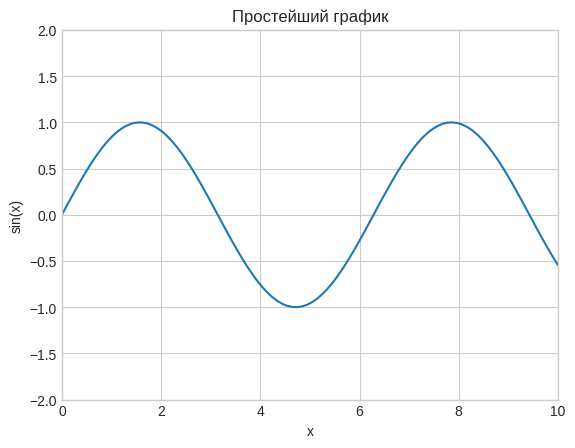

In [20]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,10), ylim=(-2,2), xlabel="x", ylabel="sin(x)", title="Простейший график")